In [1]:
import numpy as np
import os
import scipy.io as scio

In [3]:
ls ../data/salcon

coco/  fixations.zip  images/  image.zip  maps.zip  test/  train/  val/


In [7]:
data_path_train ='../data/salcon/train'
data_path_val = '../data/salcon/val'
files_train = os.listdir(data_path_train)
files_val = os.listdir(data_path_val)

In [8]:
files_train[:10]
files_val[:10]

['COCO_val2014_000000087383.png',
 'COCO_val2014_000000284160.png',
 'COCO_val2014_000000558608.mat',
 'COCO_val2014_000000432106.png',
 'COCO_val2014_000000288442.png',
 'COCO_val2014_000000398727.mat',
 'COCO_val2014_000000361073.png',
 'COCO_val2014_000000033073.png',
 'COCO_val2014_000000321195.mat',
 'COCO_val2014_000000024396.mat']

In [12]:
train_prefix = 'COCO_train2014_'
val_prefix  = 'COCO_val2014_'
print(files_train[0])
print(files_train[0][len(train_prefix):-(len('.mat'))])

COCO_train2014_000000519707.mat
000000519707


In [13]:
ls

cocoapi/  preprocessing.py  Untitled.ipynb


In [14]:
from cocoapi.PythonAPI.pycocotools.coco import COCO

In [15]:
coco = COCO('../data/salcon/coco/labels/annotations/instances_train2014.json') 

loading annotations into memory...
Done (t=11.70s)
creating index...
index created!


In [18]:
imgIds = coco.getImgIds(imgIds=131498)
img = coco.loadImgs(imgIds)[0]

In [58]:
coco.loadImgs(imgIds)

[{'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000131498.jpg',
  'date_captured': '2013-11-20 12:28:17',
  'file_name': 'COCO_train2014_000000131498.jpg',
  'flickr_url': 'http://farm7.staticflickr.com/6222/6239283765_d43881155b_z.jpg',
  'height': 480,
  'id': 131498,
  'license': 3,
  'width': 640}]

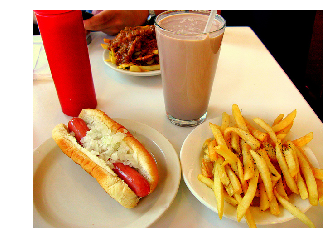

In [21]:
import skimage.io as io
I  = io.imread(img['coco_url']) 
import matplotlib.pyplot as plt
%matplotlib inline

plt.axis('off')
plt.imshow(I)

In [22]:
annIds =coco.getAnnIds(imgIds=img['id'])

In [25]:
annIds
anns = coco.loadAnns(annIds)

In [49]:
anns[0]

{'area': 342.10360000000014,
 'bbox': [106.46, 0.0, 29.35, 23.48],
 'category_id': 77,
 'id': 328043,
 'image_id': 131498,
 'iscrowd': 0,
 'segmentation': [[111.49, 0.0, 135.81, 8.38, 112.33, 23.48, 106.46, 2.51]]}

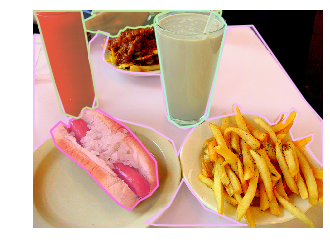

In [27]:
plt.imshow(I); plt.axis('off')
coco.showAnns(anns)

In [31]:
masks = [coco.annToMask(element) for element in anns]

In [55]:
anns[0]

{'area': 342.10360000000014,
 'bbox': [106.46, 0.0, 29.35, 23.48],
 'category_id': 77,
 'id': 328043,
 'image_id': 131498,
 'iscrowd': 0,
 'segmentation': [[111.49, 0.0, 135.81, 8.38, 112.33, 23.48, 106.46, 2.51]]}

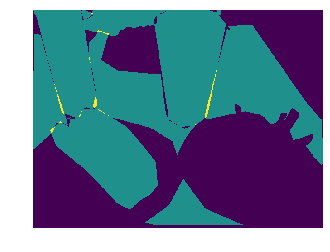

In [56]:
plt.imshow(I); plt.axis('off')

fake_annots = (sum(masks)==2).astype(int)
plt.imshow(sum(masks))

In [57]:
coco.loadCats(coco.getCatIds())

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [59]:
masks[0].shape

(480, 640)

In [60]:
canvas = np.zeros(masks[0].shape)
for element in masks:
    this_mask = element.copy()
    this_mask 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])